# Machine Learning in Python - Deep Learning

In [58]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML, Image
from IPython.display import SVG

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import visualize_tree

from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

from keras.models import Sequential
from keras.layers import Dense, Activation, Merge, Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


## Dataset Pre-Processing

Read in a dataset

In [59]:
abt = pd.read_csv("mnist_train_small.csv", encoding = "ISO-8859-1")

# Put all but the target variable into the descriptive features array
X = abt[abt.columns.difference(["value"])]
Y = abt["value"]

# Use a range scaling to scale all variables to between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
cols = X.columns
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = cols) # Watch out for putting back in columns here

X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(X, Y, random_state=0, test_size = 0.30, train_size = 0.7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_plus_valid, y_train_plus_valid, random_state=0, test_size = 0.199/0.7, train_size = 0.5/0.7)

In [60]:
X_train_plus_valid.shape

(7000, 784)

In [61]:
abt.head()

,value,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,...,X0.608,X0.609,X0.610,X0.611,X0.612,X0.613,X0.614,X0.615,X0.616,X0.617
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

Specfiy the structure of the neural network model

In [62]:
model = Sequential()
model.add(Dense(input_dim=784, units=512))
model.add(Activation("sigmoid"))
model.add(Dense(units=207))
model.add(Activation("sigmoid"))
model.add(Dense(units=102))
model.add(Activation("sigmoid"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

Specify the parameters of the model optimisation process

In [63]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [64]:
# Convert the singl column label into a dummy coded label.. kind of hot encoding
y_train_wide = to_categorical(np.asarray(y_train))
y_valid_wide = to_categorical(np.asarray(y_valid))

In [65]:
model.fit(np.asfarray(X_train), np.asfarray(y_train_wide), \
          epochs=20, batch_size=32, verbose=1, \
          validation_data=(np.asfarray(X_valid), np.asfarray(y_valid_wide)))

Train on 5000 samples, validate on 1991 samples
Epoch 1/20
5000/5000 [==============================] - 7s 1ms/step - loss: 1.4077 - acc: 0.5810 - val_loss: 0.7703 - val_acc: 0.8006

Evaluate the model

In [66]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model.predict_classes(np.asfarray(X_train), batch_size=32)

# Print performance details
print("Accuracy: - ", metrics.accuracy_score(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))



print("****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict_classes(np.asfarray(X_valid))

# Print performance details
print("Accuracy: - ", metrics.accuracy_score(y_valid,y_pred))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict_classes(np.asfarray(X_test))

# Print performance details
print("Accuracy: - ", metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

******** Training Data ********
Accuracy: -  0.9944
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       520
          1       1.00      1.00      1.00       568
          2       0.99      1.00      0.99       450
          3       0.99      0.99      0.99       513
          4       0.97      1.00      0.99       466
          5       1.00      1.00      1.00       455
          6       0.99      1.00      1.00       479
          7       1.00      1.00      1.00       550
          8       1.00      1.00      1.00       496
          9       1.00      0.97      0.98       503

avg / total       0.99      0.99      0.99      5000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,519,0,0,0,0,0,1,0,0,0,520
1,0,567,0,0,0,0,1,0,0,0,568
2,0,0,448,1,0,0,1,0,0,0,450
3,0,0,2,510,0,0,0,0,1,0,513
4,0,0,0,0,466,0,0,0,0,0,466
5,0,0,0,0,0,455,0,0,0,0,455
6,0,0,0,0,0,0,479,0,0,0,479
7,0,1,1,0,0,0,0,548,0,0,550
8,0,0,0,1,0,0,1,0,494,0,496


****** Validation Data ********
Accuracy: -  0.9367152184831743
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       221
          1       0.94      0.97      0.96       222
          2       0.95      0.92      0.93       195
          3       0.90      0.94      0.92       201
          4       0.93      0.95      0.94       187
          5       0.95      0.89      0.92       190
          6       0.93      0.97      0.95       197
          7       0.96      0.96      0.96       203
          8       0.93      0.90      0.92       198
          9       0.93      0.88      0.90       177

avg / total       0.94      0.94      0.94      1991

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,215,0,0,0,0,0,3,0,2,1,221
1,0,216,1,4,0,0,0,0,1,0,222
2,2,2,179,1,0,0,6,2,3,0,195
3,0,2,3,189,0,3,1,0,1,2,201
4,0,2,1,0,177,1,0,0,2,4,187
5,3,0,0,8,2,170,1,1,2,3,190
6,1,1,0,0,0,3,191,0,1,0,197
7,1,1,2,0,1,1,0,195,1,1,203
8,1,3,1,7,2,1,3,1,178,1,198


****** Test Data ********
Accuracy: -  0.9326666666666666
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       289
          1       0.97      0.99      0.98       355
          2       0.94      0.88      0.91       303
          3       0.89      0.93      0.91       303
          4       0.92      0.96      0.94       269
          5       0.90      0.93      0.92       286
          6       0.91      0.95      0.93       310
          7       0.96      0.95      0.95       299
          8       0.90      0.89      0.90       287
          9       0.96      0.89      0.92       299

avg / total       0.93      0.93      0.93      3000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,275,0,0,1,1,3,4,1,3,1,289
1,0,350,0,1,0,0,1,0,2,1,355
2,3,4,267,9,3,2,6,1,8,0,303
3,0,0,3,283,0,7,1,4,2,3,303
4,0,2,0,0,257,0,5,0,1,4,269
5,1,0,1,6,2,266,6,0,4,0,286
6,2,0,3,1,3,4,296,0,1,0,310
7,1,1,8,2,2,2,0,283,0,0,299
8,1,3,1,10,0,8,7,0,256,1,287


Draw the model

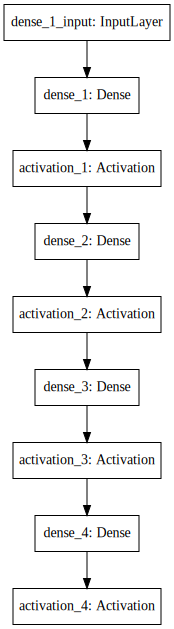

In [67]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Building a Better Model

A more complicated model - based on [https://raw.githubusercontent.com/fchollet/keras/master/examples/mnist_mlp.py](https://raw.githubusercontent.com/fchollet/keras/master/examples/mnist_mlp.py)

In [68]:
model_mlp = Sequential()
model_mlp.add(Dense(512, input_shape=(784,)))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(512))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(10))
model_mlp.add(Activation('softmax'))

model_mlp.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert the singl column label into a dummy coded label
y_train_wide = to_categorical(np.asarray(y_train))
y_valid_wide = to_categorical(np.asarray(y_valid))
model_mlp.fit(np.asfarray(X_train), np.asfarray(y_train_wide), \
          epochs=20, batch_size=32, verbose=1, \
          validation_data=(np.asfarray(X_valid), np.asfarray(y_valid_wide)))

Train on 5000 samples, validate on 1991 samples
Epoch 1/20
5000/5000 [==============================] - 3s 597us/step - loss: 0.5903 - acc: 0.8178 - val_loss: 0.3311 - val_acc: 0.9056

Evaluate the model

In [69]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model_mlp.predict_classes(np.asfarray(X_train), batch_size=32)

# Print performance details
print("Accuracy :-" , metrics.accuracy_score(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))



print("****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = model_mlp.predict_classes(np.asfarray(X_valid))

# Print performance details
print("Accuracy :-" , metrics.accuracy_score(y_valid, y_pred))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))




print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model_mlp.predict_classes(np.asfarray(X_test))

# Print performance details
print("Accuracy :-" , metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

******** Training Data ********
Accuracy :- 0.9862
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       520
          1       1.00      1.00      1.00       568
          2       1.00      1.00      1.00       450
          3       0.96      0.98      0.97       513
          4       1.00      0.99      1.00       466
          5       1.00      0.92      0.96       455
          6       1.00      1.00      1.00       479
          7       1.00      0.97      0.99       550
          8       0.98      0.99      0.99       496
          9       0.98      1.00      0.99       503

avg / total       0.99      0.99      0.99      5000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,520,0,0,0,0,0,0,0,0,0,520
1,0,568,0,0,0,0,0,0,0,0,568
2,0,0,449,0,0,0,0,1,0,0,450
3,0,0,0,505,0,0,0,0,8,0,513
4,2,0,0,0,463,0,0,0,0,1,466
5,20,0,0,16,0,417,1,0,1,0,455
6,0,0,0,0,0,0,479,0,0,0,479
7,6,0,0,0,0,0,0,535,0,9,550
8,0,1,0,3,0,0,0,0,492,0,496


****** Validation Data ********
Accuracy :- 0.9326971371170266
             precision    recall  f1-score   support

          0       0.90      0.99      0.94       221
          1       0.94      0.97      0.96       222
          2       0.97      0.91      0.94       195
          3       0.90      0.92      0.91       201
          4       0.97      0.95      0.96       187
          5       0.98      0.81      0.88       190
          6       0.98      0.97      0.97       197
          7       0.98      0.91      0.94       203
          8       0.88      0.94      0.91       198
          9       0.84      0.95      0.90       177

avg / total       0.94      0.93      0.93      1991

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,218,0,0,0,0,0,0,0,2,1,221
1,0,216,1,3,0,0,0,0,1,1,222
2,3,2,178,1,0,0,3,2,5,1,195
3,1,1,1,185,0,0,1,1,9,2,201
4,0,0,1,0,177,1,0,0,1,7,187
5,12,0,0,10,0,153,0,1,6,8,190
6,1,1,0,1,0,2,191,0,1,0,197
7,3,3,1,0,1,0,0,184,1,10,203
8,2,4,0,4,1,0,0,0,186,1,198


****** Test Data ********
Accuracy :- 0.9356666666666666
             precision    recall  f1-score   support

          0       0.86      0.98      0.92       289
          1       0.98      0.99      0.98       355
          2       0.97      0.92      0.95       303
          3       0.91      0.93      0.92       303
          4       0.96      0.95      0.95       269
          5       0.97      0.80      0.88       286
          6       0.95      0.94      0.94       310
          7       0.96      0.94      0.95       299
          8       0.88      0.94      0.91       287
          9       0.93      0.95      0.94       299

avg / total       0.94      0.94      0.94      3000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,283,1,0,0,0,0,0,0,3,2,289
1,0,351,0,1,0,0,0,1,1,1,355
2,3,3,280,3,2,0,3,2,7,0,303
3,1,0,1,281,0,0,0,4,14,2,303
4,2,1,0,0,255,0,5,0,2,4,269
5,17,0,1,18,2,230,5,0,7,6,286
6,7,2,2,0,1,5,290,0,3,0,310
7,4,1,3,1,1,0,0,282,0,7,299
8,6,0,0,4,3,1,1,1,270,1,287


Draw the model

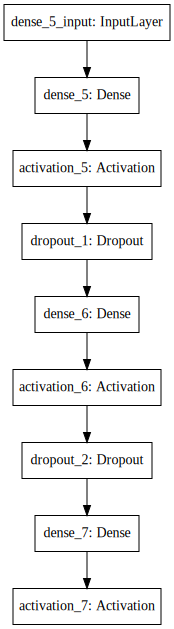

In [70]:
SVG(model_to_dot(model_mlp).create(prog='dot', format='svg'))